# MI_FCHD - KNN Classifier - Period 1

In [1]:
#import dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [2]:
#read in data set
df = pd.read_csv("Resources/MI_final_data.csv")
df.head(20)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,PREVMI,PREVSTRK,PREVHYP,TIME,PERIOD,DEATH,HOSPMI,MI_FCHD,TIMEMI,TIMEMIFC
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,0,0,0,0,1,0,1,1,6438,6438
1,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,0,0,1,0,0,0,8766,8766
2,9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,...,0,0,0,0,1,0,0,0,8766,8766
3,10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,...,0,0,1,0,1,1,0,0,2956,2956
4,11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,...,0,0,0,0,1,0,0,0,8766,8766
5,11263,2,228.0,43,180.0,110.0,0,0.0,30.30,0,...,0,0,1,0,1,0,0,1,8766,5719
6,12629,2,205.0,63,138.0,71.0,0,0.0,33.11,0,...,0,0,0,0,1,0,0,0,8766,8766
7,12806,2,313.0,45,100.0,71.0,1,20.0,21.68,0,...,0,0,0,0,1,0,0,0,8766,8766
8,14367,1,260.0,52,141.5,89.0,0,0.0,26.36,0,...,0,0,1,0,1,0,0,0,8766,8766
9,16365,1,225.0,43,162.0,107.0,1,30.0,23.61,0,...,0,0,1,0,1,0,0,0,8766,8766


In [3]:
mi_fchd_df = df.set_index('RANDID')
#Remove columns not involved in analysis
mi_fchd_df = mi_fchd_df[['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE',
       'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE',
       'PREVCHD', 'PREVAP', 'PREVSTRK', 'PREVHYP', 'MI_FCHD']]
mi_fchd_df.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVCHD,PREVAP,PREVSTRK,PREVHYP,MI_FCHD
RANDID,,,,,,,,,,,,,,,,,
2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0,0,0,1
6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,0,0,0,0,0
9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,0.0,75.0,70.0,0,0,0,0,0
10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,0.0,65.0,103.0,0,0,0,1,0
11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,0.0,85.0,85.0,0,0,0,0,0


In [5]:
y = mi_fchd_df["MI_FCHD"]
target_names = ["negative", "positive"]

In [6]:
X = mi_fchd_df.drop("MI_FCHD", axis=1)
X.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVCHD,PREVAP,PREVSTRK,PREVHYP
RANDID,,,,,,,,,,,,,,,,
2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0,0,0
6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,0,0,0,0
9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,0.0,75.0,70.0,0,0,0,0
10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,0.0,65.0,103.0,0,0,0,1
11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,0.0,85.0,85.0,0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=49)

In [8]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [9]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties

train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.765
k: 3, Train/Test Score: 0.881/0.825
k: 5, Train/Test Score: 0.864/0.837
k: 7, Train/Test Score: 0.859/0.839
k: 9, Train/Test Score: 0.854/0.841
k: 11, Train/Test Score: 0.853/0.845
k: 13, Train/Test Score: 0.852/0.849
k: 15, Train/Test Score: 0.855/0.848
k: 17, Train/Test Score: 0.853/0.851
k: 19, Train/Test Score: 0.852/0.849
k: 21, Train/Test Score: 0.853/0.847
k: 23, Train/Test Score: 0.851/0.847
k: 25, Train/Test Score: 0.850/0.846
k: 27, Train/Test Score: 0.849/0.847
k: 29, Train/Test Score: 0.850/0.847


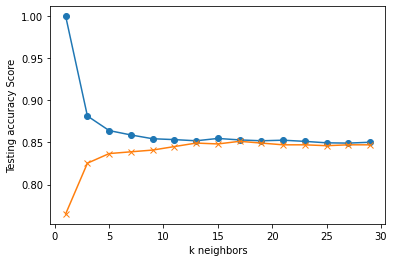

In [13]:
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [14]:
# Choose K = 17 from above and re-fit the KNN Classifier using that k value.
# Note that k = 17 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=17 Test Acc: 0.851


In [15]:
#Make predictions (0 = no event occurred, 1 = event occurred)
predictions = knn.predict(X_test_scaled)
cvd_predictions = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
cvd_predictions

,Prediction,Actual
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
957,0,0
958,0,0
959,0,0
960,0,1


In [16]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.85      1.00      0.92       815
    positive       0.75      0.04      0.08       147

    accuracy                           0.85       962
   macro avg       0.80      0.52      0.50       962
weighted avg       0.84      0.85      0.79       962



In [17]:
p0a0 = cvd_predictions.loc[(cvd_predictions['Prediction']==0) & (cvd_predictions['Actual']==0)]
p1a1 = cvd_predictions.loc[(cvd_predictions['Prediction']==1) & (cvd_predictions['Actual']==1)]
p0a1 = cvd_predictions.loc[(cvd_predictions['Prediction']==0) & (cvd_predictions['Actual']==1)]
p1a0 = cvd_predictions.loc[(cvd_predictions['Prediction']==1) & (cvd_predictions['Actual']==0)]

print(f"Event prediction = 0 and actual = 0:  {len(p0a0)}")
print(f"Event prediction = 1 and actual = 1:  {len(p1a1)}")
print(f"Event prediction = 0 and actual = 1:  {len(p0a1)}")
print(f"Event prediction = 1 and actual = 0:  {len(p1a0)}")

Event prediction = 0 and actual = 0:  813
Event prediction = 1 and actual = 1:  6
Event prediction = 0 and actual = 1:  141
Event prediction = 1 and actual = 0:  2


## Separating by gender

In [18]:
#filter df by gender (males = 1, females = 2)
male_mi_fchd = mi_fchd_df.loc[(mi_fchd_df["SEX"] ==1)]
female_mi_fchd = mi_fchd_df.loc[(mi_fchd_df["SEX"] ==2)]

In [19]:
male_mi_fchd_df = male_mi_fchd.drop('SEX', axis=1)
female_mi_fchd_df = female_mi_fchd.drop('SEX', axis=1)

In [22]:
male_mi_fchd_df

,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVCHD,PREVAP,PREVSTRK,PREVHYP,MI_FCHD
RANDID,,,,,,,,,,,,,,,,
2448,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0,0,0,1
9428,245.0,48,127.5,80.0,1,20.0,25.34,0,0.0,75.0,70.0,0,0,0,0,0
14367,260.0,52,141.5,89.0,0,0.0,26.36,0,0.0,76.0,79.0,0,0,0,1,0
16365,225.0,43,162.0,107.0,1,30.0,23.61,0,0.0,93.0,88.0,0,0,0,1,0
20375,294.0,46,142.0,94.0,1,15.0,26.31,0,0.0,98.0,64.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982118,187.0,58,141.0,81.0,0,0.0,24.96,0,0.0,80.0,81.0,0,0,0,1,0
9983319,176.0,68,168.0,97.0,0,0.0,23.14,0,0.0,60.0,79.0,0,0,0,1,0
9984683,313.0,50,179.0,92.0,1,1.0,25.97,0,0.0,66.0,86.0,0,0,0,1,1


In [20]:
y_male = male_mi_fchd_df["MI_FCHD"]
male_target_names = ["negative", "positive"]

y_female = female_mi_fchd_df["MI_FCHD"]
female_target_names = ["negative", "positive"]

In [24]:
X_male = male_mi_fchd_df.drop("MI_FCHD", axis=1)
X_female = female_mi_fchd_df.drop("MI_FCHD", axis=1)

In [25]:
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_male, y_male, random_state=49)
X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_female, y_female, random_state=49)

In [26]:
# Create a StandardScater model and fit it to the training data - male

X_male_scaler = StandardScaler().fit(X_male_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_male_train_scaled = X_male_scaler.transform(X_male_train)
X_male_test_scaled = X_male_scaler.transform(X_male_test)

In [27]:
m_train_scores = []
m_test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_male_train_scaled, y_male_train)
    train_score = knn.score(X_male_train_scaled, y_male_train)
    test_score = knn.score(X_male_test_scaled, y_male_test)
    m_train_scores.append(train_score)
    m_test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.660
k: 3, Train/Test Score: 0.835/0.735
k: 5, Train/Test Score: 0.800/0.733
k: 7, Train/Test Score: 0.793/0.744
k: 9, Train/Test Score: 0.794/0.744
k: 11, Train/Test Score: 0.787/0.758
k: 13, Train/Test Score: 0.785/0.751
k: 15, Train/Test Score: 0.785/0.744
k: 17, Train/Test Score: 0.782/0.753
k: 19, Train/Test Score: 0.783/0.756


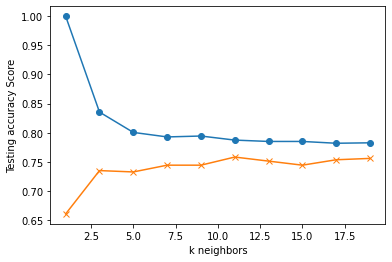

In [28]:
plt.plot(range(1, 20, 2), m_train_scores, marker='o')
plt.plot(range(1, 20, 2), m_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [29]:
# Choose K = 11 from above and re-fit the KNN Classifier using that k value.
# Note that k = 11 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_male_train_scaled, y_male_train)
print('k=11 Test Acc: %.3f' % knn.score(X_male_test_scaled, y_male_test))

k=11 Test Acc: 0.758


In [30]:
#Make predictions (0 = no event occurred, 1 = event occurred)
m_predictions = knn.predict(X_male_test_scaled)
m_cvd_predictions = pd.DataFrame({"Prediction": m_predictions, "Actual": y_male_test}).reset_index(drop=True)
m_cvd_predictions

,Prediction,Actual
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
425,0,0
426,0,0
427,1,0
428,0,0


In [32]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_male_test, m_predictions,
                            target_names=male_target_names))

              precision    recall  f1-score   support

    negative       0.78      0.96      0.86       330
    positive       0.41      0.09      0.15       100

    accuracy                           0.76       430
   macro avg       0.59      0.53      0.50       430
weighted avg       0.69      0.76      0.69       430



In [33]:
mp0a0 = m_cvd_predictions.loc[(m_cvd_predictions['Prediction']==0) & (m_cvd_predictions['Actual']==0)]
mp1a1 = m_cvd_predictions.loc[(m_cvd_predictions['Prediction']==1) & (m_cvd_predictions['Actual']==1)]
mp0a1 = m_cvd_predictions.loc[(m_cvd_predictions['Prediction']==0) & (m_cvd_predictions['Actual']==1)]
mp1a0 = m_cvd_predictions.loc[(m_cvd_predictions['Prediction']==1) & (m_cvd_predictions['Actual']==0)]

print(f"Event prediction = 0 and actual = 0 (male):  {len(mp0a0)}")
print(f"Event prediction = 1 and actual = 1 (male):  {len(mp1a1)}")
print(f"Event prediction = 0 and actual = 1 (male):  {len(mp0a1)}")
print(f"Event prediction = 1 and actual = 0 (male):  {len(mp1a0)}")

Event prediction = 0 and actual = 0 (male):  317
Event prediction = 1 and actual = 1 (male):  9
Event prediction = 0 and actual = 1 (male):  91
Event prediction = 1 and actual = 0 (male):  13


In [34]:
# Create a StandardScater model and fit it to the training data - female

X_female_scaler = StandardScaler().fit(X_female_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_female_train_scaled = X_female_scaler.transform(X_female_train)
X_female_test_scaled = X_female_scaler.transform(X_female_test)

In [37]:
f_train_scores = []
f_test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_female_train_scaled, y_female_train)
    train_score = knn.score(X_female_train_scaled, y_female_train)
    test_score = knn.score(X_female_test_scaled, y_female_test)
    f_train_scores.append(train_score)
    f_test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.835
k: 3, Train/Test Score: 0.929/0.880
k: 5, Train/Test Score: 0.912/0.901
k: 7, Train/Test Score: 0.915/0.897
k: 9, Train/Test Score: 0.913/0.902
k: 11, Train/Test Score: 0.911/0.908
k: 13, Train/Test Score: 0.910/0.908
k: 15, Train/Test Score: 0.910/0.904
k: 17, Train/Test Score: 0.910/0.904
k: 19, Train/Test Score: 0.910/0.904


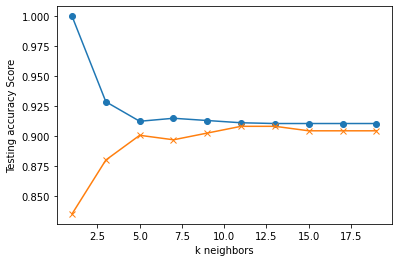

In [38]:
plt.plot(range(1, 20, 2), f_train_scores, marker='o')
plt.plot(range(1, 20, 2), f_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [39]:
# Choose K = 11 from above and re-fit the KNN Classifier using that k value.
# Note that k = 11 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_female_train_scaled, y_female_train)
print('k=11 Test Acc: %.3f' % knn.score(X_female_test_scaled, y_female_test))

k=11 Test Acc: 0.908


In [43]:
#Make predictions (0 = no event occurred, 1 = event occurred)
f_predictions = knn.predict(X_female_test_scaled)
f_cvd_predictions = pd.DataFrame({"Prediction": f_predictions, "Actual": y_female_test}).reset_index(drop=True)

fp0a0 = f_cvd_predictions.loc[(f_cvd_predictions['Prediction']==0) & (f_cvd_predictions['Actual']==0)]
fp1a1 = f_cvd_predictions.loc[(f_cvd_predictions['Prediction']==1) & (f_cvd_predictions['Actual']==1)]
fp0a1 = f_cvd_predictions.loc[(f_cvd_predictions['Prediction']==0) & (f_cvd_predictions['Actual']==1)]
fp1a0 = f_cvd_predictions.loc[(f_cvd_predictions['Prediction']==1) & (f_cvd_predictions['Actual']==0)]

print(f"Event prediction = 0 and actual = 0 (male):  {len(fp0a0)}")
print(f"Event prediction = 1 and actual = 1 (male):  {len(fp1a1)}")
print(f"Event prediction = 0 and actual = 1 (male):  {len(fp0a1)}")
print(f"Event prediction = 1 and actual = 0 (male):  {len(fp1a0)}")

Event prediction = 0 and actual = 0 (male):  482
Event prediction = 1 and actual = 1 (male):  2
Event prediction = 0 and actual = 1 (male):  49
Event prediction = 1 and actual = 0 (male):  0


In [42]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_female_test, f_predictions,
                            target_names=female_target_names))

              precision    recall  f1-score   support

    negative       0.91      1.00      0.95       482
    positive       1.00      0.04      0.08        51

    accuracy                           0.91       533
   macro avg       0.95      0.52      0.51       533
weighted avg       0.92      0.91      0.87       533

